 The first solution does not account for the second vector in the basis

In [343]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

In [335]:
basis = np.array([
    [.55, .93, .93], # Mood Color (subspace U)
    [.6, 0, .6], # vector 1 (subspace W)
    [0, .2, .6] # vector 2 (subspace W)
])

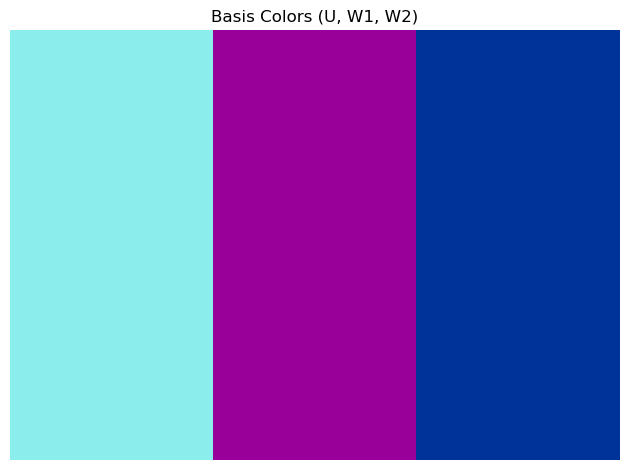

In [336]:

plt.imshow([basis], aspect='auto')
plt.title("Basis Colors (U, W1, W2)")
plt.axis('off')
plt.tight_layout()
plt.show()

In [337]:
pixel = np.array([[.3, .2, .2]])

In [338]:
coefficients = np.linalg.solve(basis, pixel[0])
print("Coefficients:", coefficients)

Coefficients: [-0.00414938 -0.01244813  0.33748271]


In [339]:

def expand_pixel(pixel: np.array, basis: np.array) -> np.ndarray:
    coefficients = np.linalg.solve(basis, pixel[0])
    
    mood = coefficients[0] * basis[0]
    complement = coefficients[1] * basis[1] + coefficients[2] * basis[2]

    expanded_pixel = np.zeros((2, 2, 3))
    
    expanded_pixel[0, 0, :] = mood # Top-left
    expanded_pixel[1, 1, :] = mood # Bottom-right
    expanded_pixel[0, 1, :] = complement # Top-right
    expanded_pixel[1, 0, :] = complement # Bottom-left
    
    return expanded_pixel

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


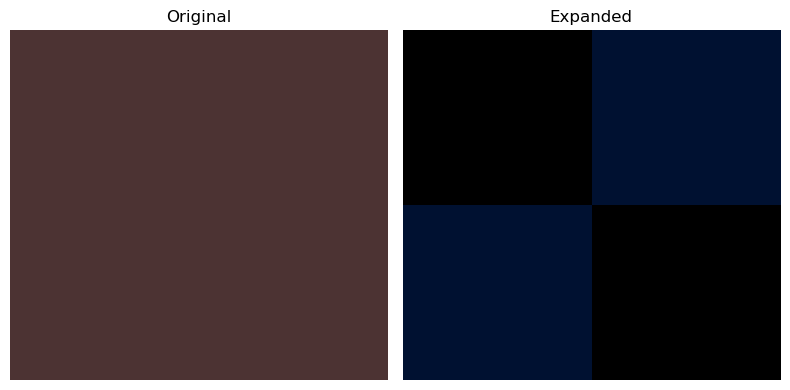

In [340]:


expanded_pixel = expand_pixel(pixel, basis)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow([pixel], aspect='auto')
ax1.axis('off')
ax1.set_title("Original")

ax2.imshow(expanded_pixel, aspect='auto')
ax2.axis('off')
ax2.set_title("Expanded")

plt.tight_layout()
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


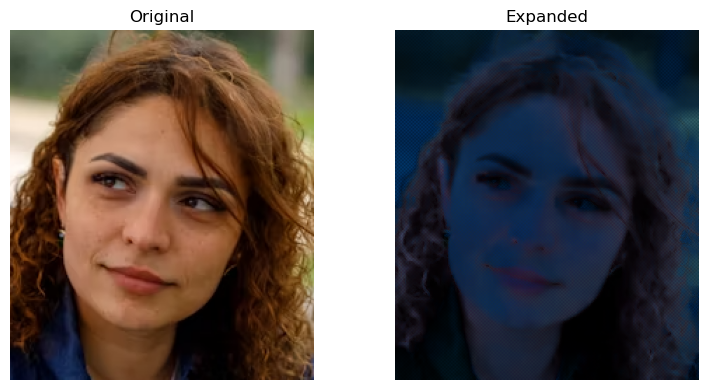

In [341]:

img = mpimg.imread('ambiguous.png')

# 
expanded_img = np.zeros((img.shape[0] * 2, img.shape[1] * 2, 3))

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        block = expand_pixel([img[i][j]], basis)
        expanded_img[2*i:2*i+2, 2*j:2*j+2] = block

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(img)
ax1.axis('off')
ax1.set_title("Original")

ax2.imshow(expanded_img)
ax2.axis('off')
ax2.set_title("Expanded")

plt.tight_layout()
plt.show()